In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

In [2]:
loans = pd.read_csv('accepted_2007_to_2017Q3.csv.gz', compression='gzip', low_memory=True)

C:\Users\vaish\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,18,48,58,117,128,129,130,133,134,135,138,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646801 entries, 0 to 1646800
Columns: 150 entries, id to settlement_term
dtypes: float64(113), object(37)
memory usage: 1.8+ GB


In [4]:
loans.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1052134,96780921,NaN,25000.0,25000.0,25000.0,60 months,23.99,719.06,E,E2,Chief Information Officer,4 years,MORTGAGE,160000.0,Verified,Feb-2017,Current,n,NaN,credit_card,Credit card refinancing,201xx,VA,23.98,1.0,Jun-2000,670.0,674.0,0.0,6.0,NaN,10.0,0.0,76157.0,96.5,17.0,f,22599.16,22599.16,7007.35,7007.35,2400.84,4606.51,0.0,0.0,0.0,Dec-2017,719.06,Jan-2018,Dec-2017,659.0,655.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,567982.0,0.0,2.0,0.0,2.0,14.0,32732.0,74.0,0.0,0.0,21443.0,88.0,78900.0,0.0,0.0,0.0,2.0,56798.0,2743.0,96.5,0.0,0.0,119.0,200.0,101.0,14.0,2.0,101.0,NaN,22.0,NaN,0.0,6.0,6.0,6.0,8.0,5.0,6.0,10.0,6.0,10.0,0.0,0.0,0.0,0.0,94.1,83.3,0.0,0.0,675336.0,108889.0,78900.0,44493.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1302532,112887537,NaN,18000.0,18000.0,18000.0,36 months,10.91,588.54,B,B4,Supervisor,2 years,RENT,65000.0,Verified,Jul-2017,Current,n,NaN,credit_card,Credit card refinancing,284xx,NC,18.63,0.0,Dec-1999,700.0,704.0,1.0,NaN,100.0,4.0,1.0,1132.0,9.7,13.0,w,15836.69,15836.69,2960.35,2960.35,2163.31,797.04,0.0,0.0,0.0,Dec-2017,628.01,Jan-2018,Dec-2017,674.0,670.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,44752.0,1.0,2.0,1.0,2.0,2.0,43620.0,91.0,1.0,1.0,1130.0,75.0,11700.0,4.0,1.0,3.0,3.0,11188.0,10568.0,9.7,0.0,0.0,73.0,211.0,8.0,2.0,1.0,8.0,NaN,1.0,NaN,0.0,2.0,2.0,2.0,6.0,5.0,2.0,7.0,2.0,4.0,0.0,0.0,0.0,2.0,100.0,0.0,1.0,0.0,59476.0,44752.0,11700.0,47776.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
loans['loan_status'].value_counts(dropna=False)

Current                                                788950
Fully Paid                                             646902
Charged Off                                            168084
Late (31-120 days)                                      23763
In Grace Period                                         10474
Late (16-30 days)                                        5786
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                    70
NaN                                                        23
Name: loan_status, dtype: int64

In [15]:
loans = loans.loc[loans['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [7]:
loans.shape

(814986, 150)

In [8]:
loans['loan_status'].value_counts(dropna=False)

Fully Paid     646902
Charged Off    168084
Name: loan_status, dtype: int64

In [9]:
loans['loan_status'].value_counts(normalize=True, dropna=False)

Fully Paid     0.793758
Charged Off    0.206242
Name: loan_status, dtype: float64

In [10]:
missing_fractions = loans.isnull().mean().sort_values(ascending=False)

In [11]:
missing_fractions.head(10)

member_id                                     1.000000
next_pymnt_d                                  1.000000
orig_projected_additional_accrued_interest    0.999876
sec_app_mths_since_last_major_derog           0.999628
hardship_length                               0.999275
hardship_type                                 0.999275
hardship_reason                               0.999275
hardship_status                               0.999275
deferral_term                                 0.999275
hardship_amount                               0.999275
dtype: float64

Text(0,0.5,'Feature count')

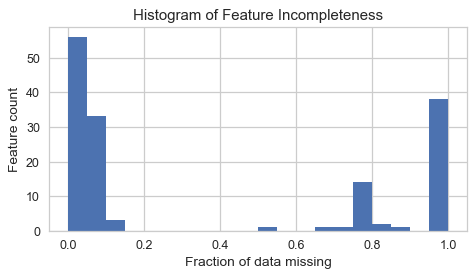

In [12]:
plt.figure(figsize=(6,3), dpi=90)
missing_fractions.plot.hist(bins=20)
plt.title('Histogram of Feature Incompleteness')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count')

In [13]:
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))
print(drop_list)

['all_util', 'annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'member_id', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last_ma

In [14]:
len(drop_list)

58

In [ ]:
loans.drop(labels=drop_list, axis=1, inplace=True)

In [16]:
loans.shape

(814986, 150)

In [17]:
print(sorted(loans.columns))

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 'annual_inc_joint', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'debt_settlement_flag_date', 'deferral_term', 'delinq_2yrs', 'delinq_amnt', 'desc', 'disbursement_method', 'dti', 'dti_joint', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_flag', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'home_ownership', 'id', 'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', '

In [18]:
keep_list  = ['addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']

In [19]:
len(keep_list)

31

In [20]:
drop_list = [col for col in loans.columns if col not in keep_list]
print(drop_list)

['member_id', 'funded_amnt', 'funded_amnt_inv', 'pymnt_plan', 'desc', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_

In [21]:
len(drop_list)

119

In [22]:
loans.drop(labels=drop_list, axis=1, inplace=True)

In [23]:
loans.shape

(814986, 31)

In [24]:
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(loans.loc[loans[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(loans[col_name], order=sorted(loans[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=loans, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = loans.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

In [25]:
print(list(loans.columns))

['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies']


In [26]:
loans['id'].sample(5)

1142426     87043933
394548      61421445
955791       1585393
1014476    101961161
1624829     69613655
Name: id, dtype: object

In [27]:
loans['id'].describe()

count       814986
unique      814986
top       14680062
freq             1
Name: id, dtype: int64

In [28]:
loans.drop('id', axis=1, inplace=True)

In [29]:
loans['loan_amnt'].describe()

count    814986.000000
mean      14315.458210
std        8499.799241
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

C:\Users\vaish\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


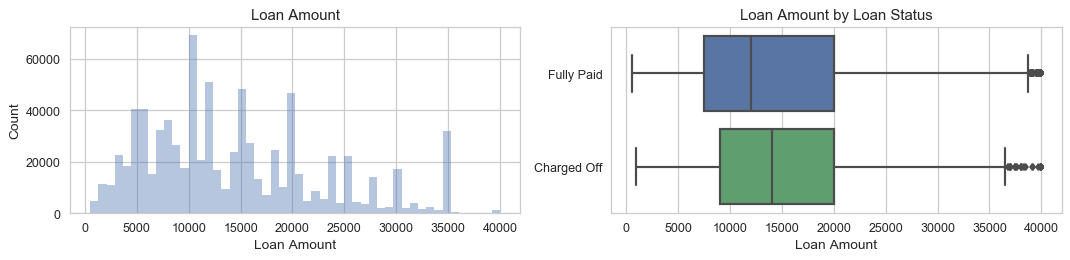

In [30]:
plot_var('loan_amnt', 'Loan Amount', continuous=True)

In [31]:
loans.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,168084.0,15384.975964,8606.476332,900.0,9000.0,14000.0,20000.0,40000.0
Fully Paid,646902.0,14037.566316,8449.740674,500.0,7500.0,12000.0,20000.0,40000.0


In [32]:
loans['term'].value_counts(dropna=False)

 36 months    618460
 60 months    196526
Name: term, dtype: int64

In [33]:
loans['term'] = loans['term'].apply(lambda s: np.int8(s.split()[0]))

In [34]:
loans['term'].value_counts(normalize=True)

36    0.75886
60    0.24114
Name: term, dtype: float64

In [35]:
loans.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

term
36    0.165710
60    0.333793
Name: loan_status, dtype: float64

In [36]:
loans['int_rate'].describe()

count    814986.000000
mean         13.490993
std           4.618486
min           5.320000
25%           9.990000
50%          13.110000
75%          16.290000
max          30.990000
Name: int_rate, dtype: float64

C:\Users\vaish\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


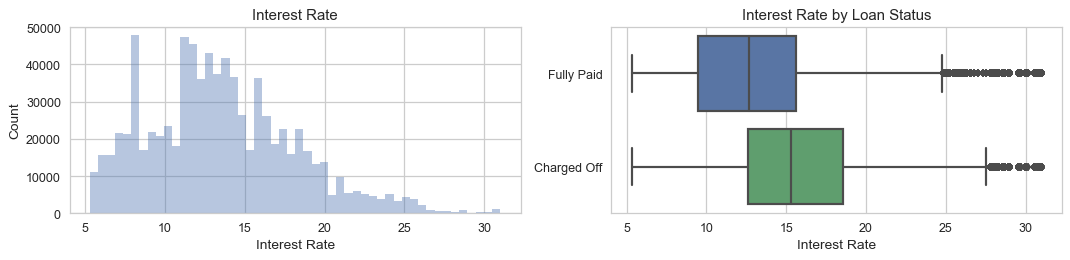

In [37]:
plot_var('int_rate', 'Interest Rate', continuous=True)

In [38]:
loans.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,168084.0,15.736335,4.625755,5.32,12.59,15.31,18.55,30.99
Fully Paid,646902.0,12.907587,4.434262,5.32,9.49,12.68,15.61,30.99


In [39]:
loans['installment'].describe()

count    814986.000000
mean        436.749624
std         255.732093
min           4.930000
25%         251.400000
50%         377.040000
75%         576.290000
max        1714.540000
Name: installment, dtype: float64

C:\Users\vaish\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


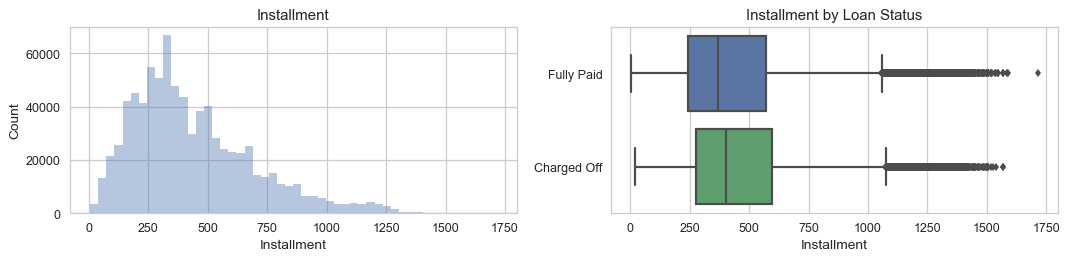

In [40]:
plot_var('installment', 'Installment', continuous=True)

In [41]:
loans.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,168084.0,459.973673,255.309267,21.62,276.14,402.39,595.87,1569.11
Fully Paid,646902.0,430.715339,255.496761,4.93,244.76,370.92,569.72,1714.54


In [42]:
print(sorted(loans['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [43]:
print(sorted(loans['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


In [44]:
loans.drop('grade', axis=1, inplace=True)

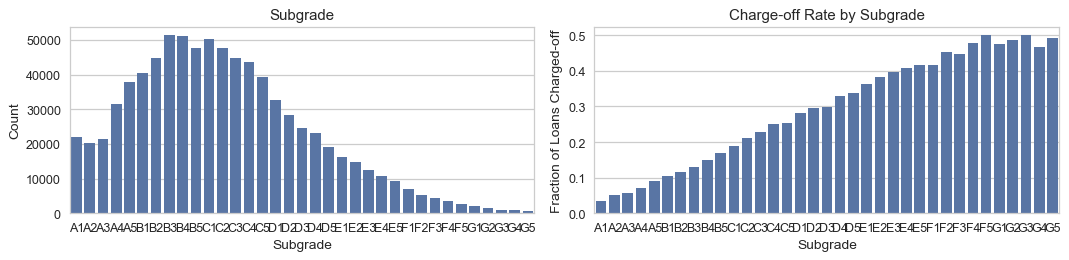

In [45]:
plot_var('sub_grade', 'Subgrade', continuous=False)

In [46]:
loans['emp_title'].describe()

count      766415
unique     280473
top       Teacher
freq        11351
Name: emp_title, dtype: object

In [47]:
loans.drop(labels='emp_title', axis=1, inplace=True)

In [48]:
loans['emp_length'].value_counts(dropna=False).sort_index()

1 year        53411
10+ years    264873
2 years       73493
3 years       64999
4 years       48752
5 years       52149
6 years       40290
7 years       39407
8 years       38887
9 years       31900
< 1 year      64572
NaN           42253
Name: emp_length, dtype: int64

In [49]:
loans['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)

In [50]:
loans['emp_length'].replace('< 1 year', '0 years', inplace=True)

In [51]:
def emp_length_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])

In [52]:
loans['emp_length'] = loans['emp_length'].apply(emp_length_to_int)

In [53]:
loans['emp_length'].value_counts(dropna=False).sort_index()

 0.0      64572
 1.0      53411
 2.0      73493
 3.0      64999
 4.0      48752
 5.0      52149
 6.0      40290
 7.0      39407
 8.0      38887
 9.0      31900
 10.0    264873
NaN       42253
Name: emp_length, dtype: int64

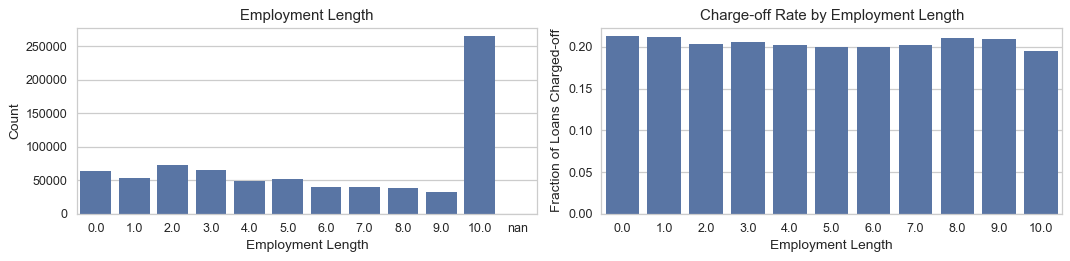

In [54]:
plot_var('emp_length', 'Employment Length', continuous=False)

In [55]:
loans['home_ownership'].value_counts(dropna=False)

MORTGAGE    406866
RENT        325071
OWN          82765
OTHER          144
ANY             94
NONE            46
Name: home_ownership, dtype: int64

In [56]:
loans['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

In [57]:
loans['home_ownership'].value_counts(dropna=False)

MORTGAGE    406866
RENT        325071
OWN          82765
OTHER          284
Name: home_ownership, dtype: int64

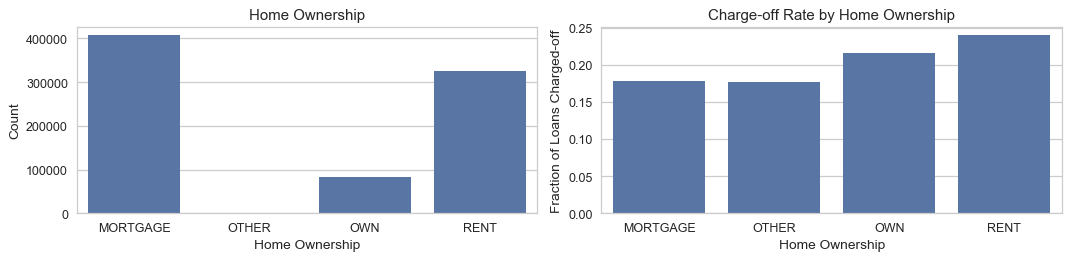

In [58]:
plot_var('home_ownership', 'Home Ownership', continuous=False)

In [59]:
loans.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

home_ownership
MORTGAGE    0.177808
OTHER       0.176056
OWN         0.215804
RENT        0.239422
Name: loan_status, dtype: float64

In [60]:
loans['annual_inc'].describe()

count    8.149860e+05
mean     7.523039e+04
std      6.524373e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.550000e+06
Name: annual_inc, dtype: float64

In [61]:
loans['log_annual_inc'] = loans['annual_inc'].apply(lambda x: np.log10(x+1))

In [62]:
loans.drop('annual_inc', axis=1, inplace=True)

In [63]:
loans['log_annual_inc'].describe()

count    814986.000000
mean          4.810836
std           0.231893
min           0.000000
25%           4.653222
50%           4.812920
75%           4.954247
max           6.980003
Name: log_annual_inc, dtype: float64

C:\Users\vaish\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


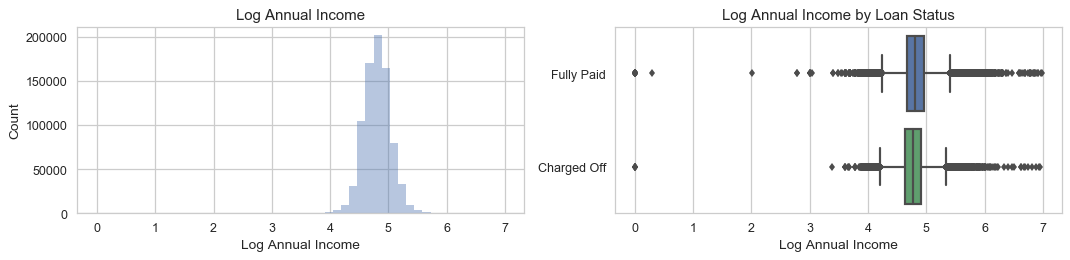

In [64]:
plot_var('log_annual_inc', 'Log Annual Income', continuous=True)

In [65]:
loans.groupby('loan_status')['log_annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,168084.0,4.777072,0.227015,0.0,4.632467,4.778158,4.915096,6.949393
Fully Paid,646902.0,4.819608,0.232342,0.0,4.672107,4.812920,4.963793,6.980003


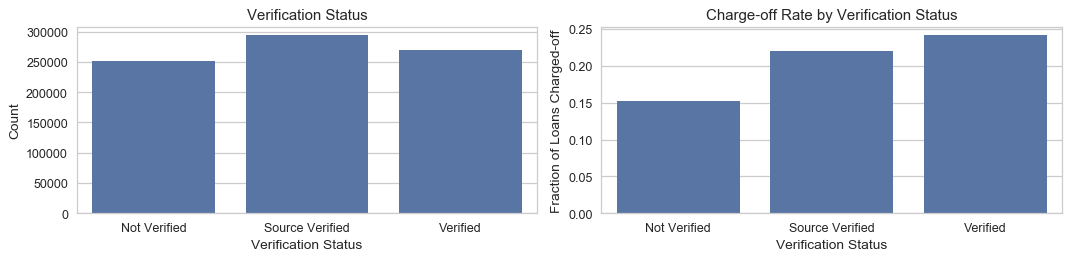

In [66]:
plot_var('verification_status', 'Verification Status', continuous=False)

In [67]:
loans['purpose'].value_counts()

debt_consolidation    481652
credit_card           175123
home_improvement       50793
other                  43900
major_purchase         17463
small_business         10214
car                     8936
medical                 8772
moving                  5725
vacation                5116
house                   4095
wedding                 2272
renewable_energy         599
educational              326
Name: purpose, dtype: int64

In [68]:
loans.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

purpose
wedding               0.121919
car                   0.148053
educational           0.171779
credit_card           0.178412
home_improvement      0.181383
major_purchase        0.183245
vacation              0.198788
house                 0.214652
other                 0.216970
debt_consolidation    0.217398
medical               0.229366
moving                0.242969
renewable_energy      0.247078
small_business        0.302428
Name: loan_status, dtype: float64

In [69]:
loans['title'].describe()

count                 807068
unique                 60298
top       Debt consolidation
freq                  371874
Name: title, dtype: object

In [70]:
loans['title'].value_counts().head(10)

Debt consolidation         371874
Credit card refinancing    133334
Home improvement            39171
Other                       33265
Debt Consolidation          15059
Major purchase              12311
Medical expenses             6908
Business                     6666
Car financing                5667
Consolidation                5090
Name: title, dtype: int64

In [71]:
loans.drop('title', axis=1, inplace=True)

In [72]:
loans['zip_code'].sample(5)

1590169    727xx
467189     351xx
221502     809xx
323243     648xx
303397     027xx
Name: zip_code, dtype: object

In [73]:
loans['zip_code'].nunique()

925

In [74]:
loans['addr_state'].sample(5)

900950     IL
1551652    NY
268271     MO
804733     CO
469582     MN
Name: addr_state, dtype: object

In [75]:
loans['addr_state'].nunique()

51

In [76]:
loans.drop(labels='zip_code', axis=1, inplace=True)

In [77]:
loans.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

addr_state
DC    0.130378
ME    0.136564
NH    0.142554
IA    0.142857
VT    0.149225
OR    0.152827
CO    0.158083
WA    0.166538
KS    0.171004
SC    0.172705
WI    0.175315
MT    0.177759
WY    0.178142
UT    0.179049
WV    0.182457
CT    0.183810
GA    0.191224
MA    0.192974
IL    0.193302
ID    0.193487
RI    0.194009
CA    0.198303
AZ    0.199321
TX    0.202286
AK    0.204141
HI    0.204535
DE    0.206575
VA    0.207942
MI    0.208880
MN    0.210363
PA    0.214776
MD    0.214845
NC    0.215282
NJ    0.216208
KY    0.216353
MO    0.219400
FL    0.222007
OH    0.225400
NM    0.225694
SD    0.225787
NY    0.227045
IN    0.228179
TN    0.230479
NV    0.234202
ND    0.237232
LA    0.237900
AR    0.243154
AL    0.247650
OK    0.248252
NE    0.267946
MS    0.275619
Name: loan_status, dtype: float64

In [78]:
loans['dti'].describe()

count    814950.000000
mean         17.867719
std           8.856477
min          -1.000000
25%          11.640000
50%          17.360000
75%          23.630000
max         999.000000
Name: dti, dtype: float64

C:\Users\vaish\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Debt-to-income Ratio')

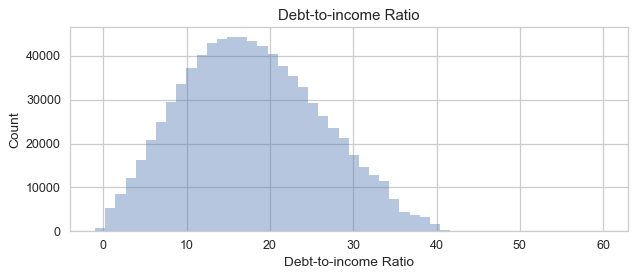

In [79]:
plt.figure(figsize=(8,3), dpi=90)
sns.distplot(loans.loc[loans['dti'].notnull() & (loans['dti']<60), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

In [80]:
(loans['dti']>=60).sum()

179

In [81]:
loans.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,168078.0,20.005334,8.991035,0.0,13.65,19.77,26.21,999.0
Fully Paid,646872.0,17.312298,8.735991,-1.0,11.22,16.77,22.90,999.0


In [82]:
loans['earliest_cr_line'].sample(5)

398773     Jan-2000
130855     Nov-2000
1459126    Jul-2007
21774      Aug-2000
812812     Nov-1998
Name: earliest_cr_line, dtype: object

In [83]:
loans['earliest_cr_line'].isnull().any()

False

In [84]:
loans['earliest_cr_line'] = loans['earliest_cr_line'].apply(lambda s: int(s[-4:]))

In [85]:
loans['earliest_cr_line'].describe()

count    814986.000000
mean       1998.170962
std           7.385629
min        1944.000000
25%        1994.000000
50%        2000.000000
75%        2003.000000
max        2014.000000
Name: earliest_cr_line, dtype: float64

C:\Users\vaish\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


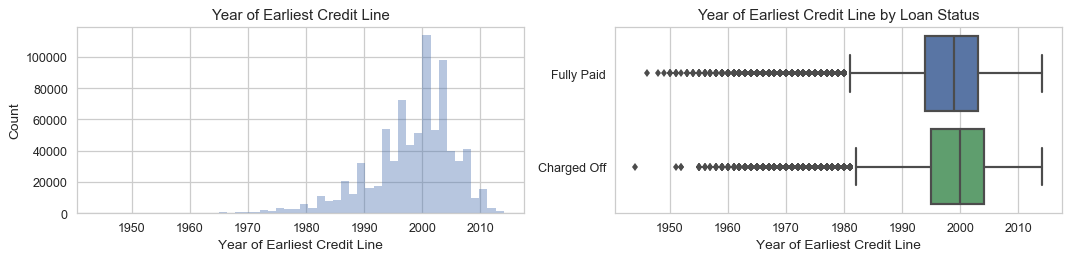

In [86]:
plot_var('earliest_cr_line', 'Year of Earliest Credit Line', continuous=True)

In [87]:
loans[['fico_range_low', 'fico_range_high']].describe()

,fico_range_low,fico_range_high
count,814986.000000,814986.000000
mean,695.603151,699.603264
std,31.352251,31.352791
min,625.000000,629.000000
25%,670.000000,674.000000
50%,690.000000,694.000000
75%,710.000000,714.000000
max,845.000000,850.000000


In [89]:
loans[['fico_range_low','fico_range_high']].corr()

,fico_range_low,fico_range_high
fico_range_low,1.0,1.0
fico_range_high,1.0,1.0


In [90]:
loans['fico_score'] = 0.5*loans['fico_range_low'] + 0.5*loans['fico_range_high']

In [91]:
loans.drop(['fico_range_high', 'fico_range_low'], axis=1, inplace=True)

C:\Users\vaish\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


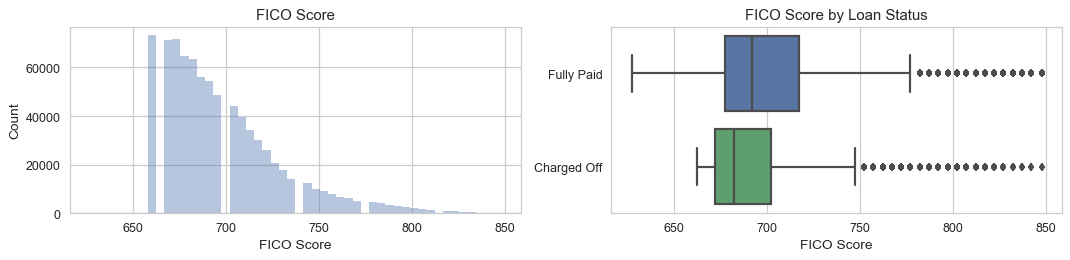

In [92]:
plot_var('fico_score', 'FICO Score', continuous=True)

In [93]:
loans.groupby('loan_status')['fico_score'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,168084.0,689.027278,25.083105,662.0,672.0,682.0,702.0,847.5
Fully Paid,646902.0,699.831485,32.416650,627.0,677.0,692.0,717.0,847.5


Text(0.5,1,'Number of Open Credit Lines')

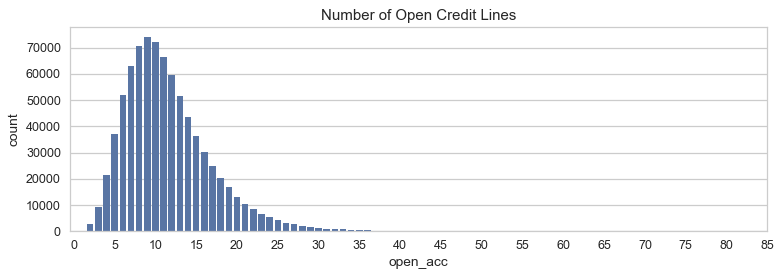

In [94]:
plt.figure(figsize=(10,3), dpi=90)
sns.countplot(loans['open_acc'], order=sorted(loans['open_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 90, 5), np.arange(0, 90, 5))
plt.title('Number of Open Credit Lines')

In [95]:
loans.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,168084.0,11.883094,5.515590,0.0,8.0,11.0,15.0,76.0
Fully Paid,646902.0,11.427041,5.270369,0.0,8.0,11.0,14.0,90.0


In [96]:
loans['pub_rec'].value_counts().sort_index()

0.0     681509
1.0     112483
2.0      14115
3.0       4107
4.0       1400
5.0        651
6.0        338
7.0        146
8.0         90
9.0         42
10.0        28
11.0        24
12.0        15
13.0        11
14.0         2
15.0         5
16.0         2
17.0         1
18.0         3
19.0         2
21.0         1
24.0         1
28.0         2
34.0         1
40.0         1
46.0         1
49.0         2
54.0         1
63.0         1
86.0         1
Name: pub_rec, dtype: int64

In [97]:
loans.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,168084.0,0.232247,0.640855,0.0,0.0,0.0,0.0,86.0
Fully Paid,646902.0,0.198845,0.569304,0.0,0.0,0.0,0.0,63.0


In [98]:
loans['revol_bal'].describe()

count    8.149860e+05
mean     1.606864e+04
std      2.160500e+04
min      0.000000e+00
25%      6.014000e+03
50%      1.118500e+04
75%      1.972300e+04
max      2.568995e+06
Name: revol_bal, dtype: float64

In [99]:
loans['log_revol_bal'] = loans['revol_bal'].apply(lambda x: np.log10(x+1))

In [100]:
loans.drop('revol_bal', axis=1, inplace=True)

C:\Users\vaish\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


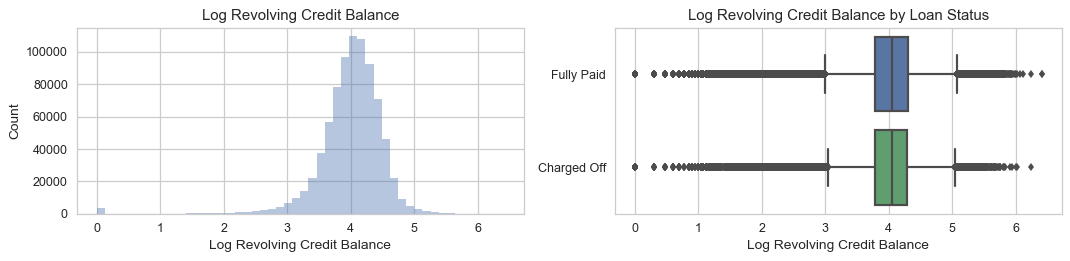

In [101]:
plot_var('log_revol_bal', 'Log Revolving Credit Balance', continuous=True)

In [102]:
loans.groupby('loan_status')['log_revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,168084.0,3.997810,0.497362,0.0,3.787602,4.051307,4.288585,6.242223
Fully Paid,646902.0,3.994933,0.527335,0.0,3.777137,4.047975,4.296665,6.409763


In [103]:
loans['revol_util'].describe()

count    814496.000000
mean         53.031137
std          24.320981
min           0.000000
25%          35.000000
50%          53.700000
75%          71.900000
max         892.300000
Name: revol_util, dtype: float64

C:\Users\vaish\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


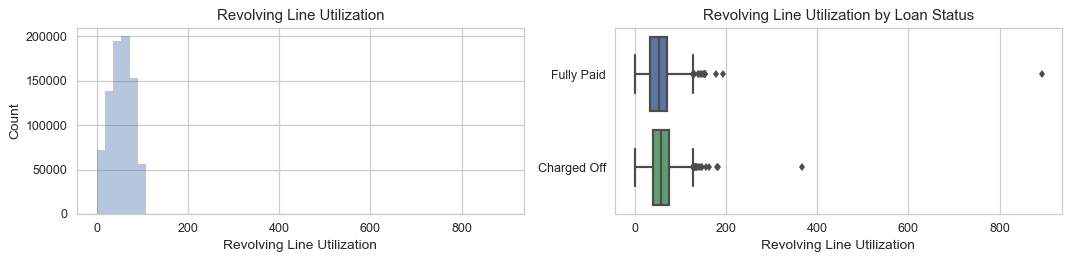

In [104]:
plot_var('revol_util', 'Revolving Line Utilization', continuous=True)

In [105]:
loans.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,167974.0,56.475417,23.566253,0.0,39.5,57.5,74.7,366.6
Fully Paid,646522.0,52.136273,24.433954,0.0,33.9,52.7,71.0,892.3


Text(0.5,1,'Total Number of Credit Lines')

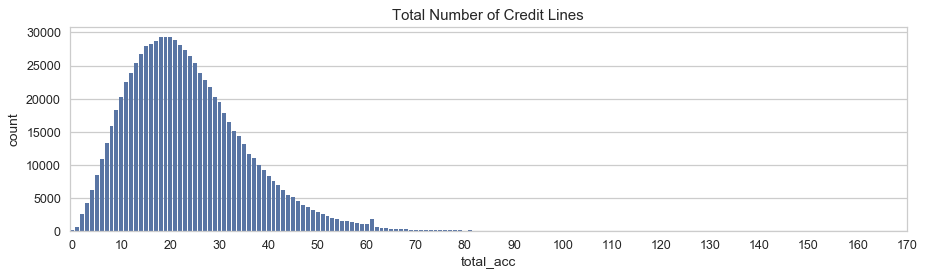

In [106]:
plt.figure(figsize=(12,3), dpi=90)
sns.countplot(loans['total_acc'], order=sorted(loans['total_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 176, 10), np.arange(0, 176, 10))
plt.title('Total Number of Credit Lines')

In [107]:
loans.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,168084.0,25.158653,12.121106,2.0,16.0,23.0,32.0,176.0
Fully Paid,646902.0,25.489618,11.930122,2.0,17.0,24.0,32.0,156.0


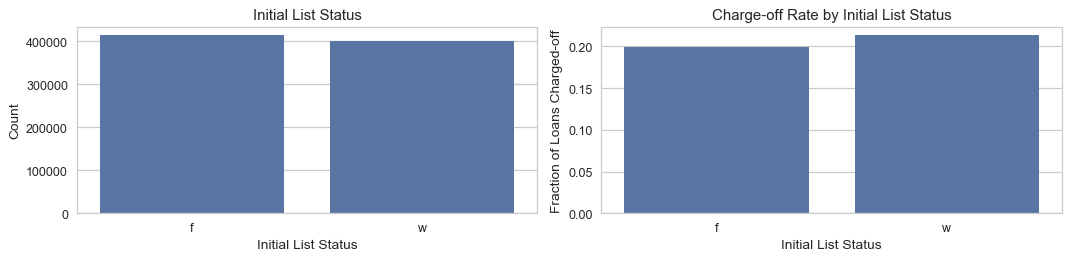

In [108]:
plot_var('initial_list_status', 'Initial List Status', continuous=False)

In [109]:
loans['application_type'].value_counts()

Individual    811207
Joint App       3779
Name: application_type, dtype: int64

In [110]:
loans.groupby('application_type')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

application_type
Individual    0.206316
Joint App     0.190262
Name: loan_status, dtype: float64

In [111]:
loans['mort_acc'].describe()

count    767705.000000
mean          1.758707
std           2.081730
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          51.000000
Name: mort_acc, dtype: float64

In [112]:
loans['mort_acc'].value_counts().head(10)

0.0    301446
1.0    131811
2.0    109869
3.0     82723
4.0     58698
5.0     37090
6.0     21817
7.0     11568
8.0      5906
9.0      3056
Name: mort_acc, dtype: int64

In [113]:
loans.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,161198.0,1.447437,1.901888,0.0,0.0,1.0,2.0,29.0
Fully Paid,606507.0,1.841436,2.119298,0.0,0.0,1.0,3.0,51.0


In [114]:
loans['pub_rec_bankruptcies'].value_counts().sort_index()

0.0     714642
1.0      93680
2.0       4673
3.0        926
4.0        234
5.0         85
6.0         28
7.0         14
8.0          5
9.0          1
12.0         1
Name: pub_rec_bankruptcies, dtype: int64

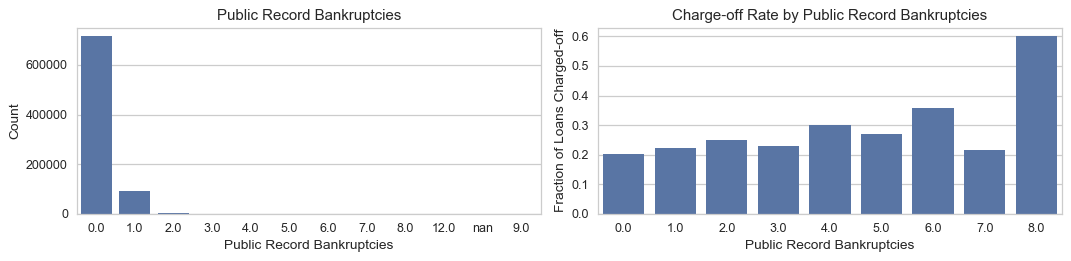

In [115]:
plot_var('pub_rec_bankruptcies', 'Public Record Bankruptcies', continuous=False)

In [116]:
loans['charged_off'] = (loans['loan_status'] == 'Charged Off').apply(np.uint8)
loans.drop('loan_status', axis=1, inplace=True)

In [117]:
loans.shape

(814986, 25)

In [118]:
missing_fractions = loans.isnull().mean().sort_values(ascending=False) # Fraction of data missing for each variable

In [119]:
print(missing_fractions[missing_fractions > 0])

mort_acc                0.058014
emp_length              0.051845
pub_rec_bankruptcies    0.000855
revol_util              0.000601
dti                     0.000044
dtype: float64


In [120]:
print(loans.columns)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'verification_status', 'issue_d',
       'purpose', 'addr_state', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies',
       'log_annual_inc', 'fico_score', 'log_revol_bal', 'charged_off'],
      dtype='object')


In [121]:
loans = pd.get_dummies(loans, columns=['sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status', 'application_type'], drop_first=True)

In [122]:
loans.shape

(814986, 122)

In [123]:
loans.sample(5)

,loan_amnt,term,int_rate,installment,emp_length,issue_d,dti,earliest_cr_line,open_acc,pub_rec,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,log_annual_inc,fico_score,log_revol_bal,charged_off,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App
617096,28000.0,36,6.92,863.54,5.0,Mar-2015,17.02,1996,14.0,0.0,53.5,23.0,0.0,0.0,5.033428,677.0,4.876397,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
309106,9000.0,36,9.76,289.40,2.0,Dec-2015,16.75,1997,19.0,0.0,17.9,26.0,0.0,0.0,5.000004,742.0,3.989628,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1326624,12000.0,36,13.99,410.08,8.0,Jun-2016,20.16,2007,9.0,1.0,62.7,9.0,1.0,1.0,4.774831,702.0,4.004321,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
41131,24000.0,36,6.49,735.47,10.0,Oct-2014,13.92,2000,12.0,0.0,24.9,41.0,5.0,0.0,5.033428,762.0,4.724784,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
867649,1000.0,36,18.25,36.28,0.0,Aug-2013,3.30,2009,2.0,0.0,94.2,4.0,0.0,0.0,4.812920,682.0,3.928242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [124]:
loans['issue_d'].sample(5)

986609     Mar-2012
938433     Jan-2013
778323     Apr-2017
1358711    May-2016
339744     Nov-2015
Name: issue_d, dtype: object

In [125]:
loans['issue_d'].isnull().any()

False

In [126]:
loans['issue_d'] = pd.to_datetime(loans['issue_d'])

In [127]:
loans['issue_d'].sample(5)

1590715   2016-02-01
80707     2014-09-01
1051288   2017-02-01
165731    2014-05-01
854231    2013-09-01
Name: issue_d, dtype: datetime64[ns]

In [128]:
loans['issue_d'].describe()

count                  814986
unique                    124
top       2014-10-01 00:00:00
freq                    33699
first     2007-06-01 00:00:00
last      2017-09-01 00:00:00
Name: issue_d, dtype: object

Text(0.5,1,'Loans Funded per Year')

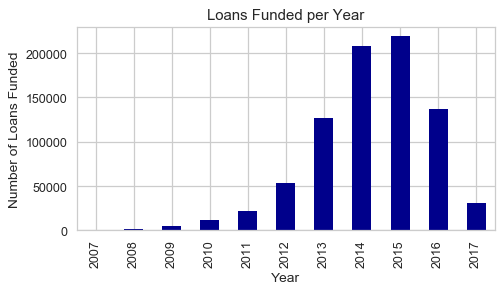

In [129]:
plt.figure(figsize=(6,3), dpi=90)
loans['issue_d'].dt.year.value_counts().sort_index().plot.bar(color='darkblue')
plt.xlabel('Year')
plt.ylabel('Number of Loans Funded')
plt.title('Loans Funded per Year')

In [130]:
loans_train = loans.loc[loans['issue_d'] <  loans['issue_d'].quantile(0.9)]
loans_test =  loans.loc[loans['issue_d'] >= loans['issue_d'].quantile(0.9)]

In [131]:
print('Number of loans in the partition:   ', loans_train.shape[0] + loans_test.shape[0])
print('Number of loans in the full dataset:', loans.shape[0])

Number of loans in the partition:    814986
Number of loans in the full dataset: 814986


In [132]:
loans_test.shape[0] / loans.shape[0]

0.10291955935439381

In [133]:
del loans

In [134]:
loans_train['issue_d'].describe()

count                  731108
unique                    109
top       2014-10-01 00:00:00
freq                    33699
first     2007-06-01 00:00:00
last      2016-06-01 00:00:00
Name: issue_d, dtype: object

In [135]:
loans_test['issue_d'].describe()

count                   83878
unique                     15
top       2016-07-01 00:00:00
freq                    10825
first     2016-07-01 00:00:00
last      2017-09-01 00:00:00
Name: issue_d, dtype: object

In [136]:
loans_train.drop('issue_d', axis=1, inplace=True)
loans_test.drop('issue_d', axis=1, inplace=True)

In [137]:
y_train = loans_train['charged_off']
y_test = loans_test['charged_off']

In [138]:
X_train = loans_train.drop('charged_off', axis=1)
X_test = loans_test.drop('charged_off', axis=1)

In [139]:
del loans_train, loans_test

In [140]:
linear_dep = pd.DataFrame()

In [141]:
for col in X_train.columns:
    linear_dep.loc[col, 'pearson_corr'] = X_train[col].corr(y_train)
linear_dep['abs_pearson_corr'] = abs(linear_dep['pearson_corr'])

In [142]:
from sklearn.feature_selection import f_classif
for col in X_train.columns:
    mask = X_train[col].notnull()
    (linear_dep.loc[col, 'F'], linear_dep.loc[col, 'p_value']) = f_classif(pd.DataFrame(X_train.loc[mask, col]), y_train.loc[mask])

In [143]:
linear_dep.sort_values('abs_pearson_corr', ascending=False, inplace=True)
linear_dep.drop('abs_pearson_corr', axis=1, inplace=True)

In [144]:
linear_dep.reset_index(inplace=True)
linear_dep.rename(columns={'index':'variable'}, inplace=True)

In [145]:
linear_dep.head(20)

,variable,pearson_corr,F,p_value
0,int_rate,0.256691,51570.855220,0.0
1,term,0.188604,26965.820737,0.0
2,fico_score,-0.139928,14600.790875,0.0
3,dti,0.131005,12766.403302,0.0
4,mort_acc,-0.076676,4044.121007,0.0
5,log_annual_inc,-0.074252,4053.225270,0.0
6,sub_grade_A4,-0.069089,3506.566794,0.0
7,revol_util,0.066569,3252.333239,0.0
8,sub_grade_A5,-0.066226,3220.711982,0.0
9,loan_amnt,0.063598,2969.118688,0.0


In [146]:
linear_dep.tail(20)

,variable,pearson_corr,F,p_value
100,addr_state_ND,0.002876,6.048675,0.013917
101,addr_state_KY,0.002838,5.890675,0.015222
102,sub_grade_C2,0.002769,5.607547,0.017884
103,addr_state_MD,0.002663,5.184521,0.022789
104,purpose_renewable_energy,0.002634,5.070839,0.024332
105,addr_state_SD,0.002580,4.866787,0.027379
106,addr_state_ME,-0.002400,4.212869,0.040119
107,addr_state_ID,0.002174,3.455750,0.063033
108,addr_state_AZ,-0.002092,3.201519,0.073570
109,purpose_educational,-0.001986,2.884806,0.089419


In [147]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

In [148]:
from sklearn.linear_model import SGDClassifier

In [149]:
pipeline_sgdlogreg = Pipeline([
    ('imputer', Imputer(copy=False)), # Mean imputation by default
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

In [150]:
param_grid_sgdlogreg = {
    'model__alpha': [10**-5, 10**-2, 10**1],
    'model__penalty': ['l1', 'l2']
}

In [151]:
grid_sgdlogreg = GridSearchCV(estimator=pipeline_sgdlogreg, param_grid=param_grid_sgdlogreg, scoring='roc_auc', n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [152]:
grid_sgdlogreg.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=False, missing_values='NaN', strategy='mean', verbose=0)), ('scaler', StandardScaler(copy=False, with_mean=True, with_std=True)), ('model', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       e...ty='l2', power_t=0.5, random_state=1, shuffle=True,
       tol=0.001, verbose=0, warm_start=True))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'model__alpha': [1e-05, 0.01, 10], 'model__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='roc_auc', verbose=1)

In [153]:
grid_sgdlogreg.best_score_

0.7138651282339733

In [154]:
grid_sgdlogreg.best_params_

{'model__alpha': 0.01, 'model__penalty': 'l2'}

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [156]:
pipeline_rfc = Pipeline([
    ('imputer', Imputer(copy=False)),
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

In [157]:
param_grid_rfc = {
    'model__n_estimators': [50] # The number of randomized trees to build
}

In [158]:
grid_rfc = GridSearchCV(estimator=pipeline_rfc, param_grid=param_grid_rfc, scoring='roc_auc', n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [159]:
grid_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.3min remaining:  6.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=False, missing_values='NaN', strategy='mean', verbose=0)), ('model', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_im...stimators=10, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'model__n_estimators': [50]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=False, scoring='roc_auc', verbose=1)

In [160]:
grid_rfc.best_score_

0.6972644945776202

In [161]:
from sklearn.neighbors import KNeighborsClassifier

In [162]:
pipeline_knn = Pipeline([
    ('imputer', Imputer(copy=False)),
    ('scaler', StandardScaler(copy=False)),
    ('lda', LinearDiscriminantAnalysis()),
    ('model', KNeighborsClassifier(n_jobs=-1))
])

In [163]:
param_grid_knn = {
    'lda__n_components': [3, 9], # Number of LDA components to keep
    'model__n_neighbors': [5, 25, 125] # The 'k' in k-nearest neighbors
}

In [164]:
grid_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid_knn, scoring='roc_auc', n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [165]:
grid_knn.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=False, missing_values='NaN', strategy='mean', verbose=0)), ('scaler', StandardScaler(copy=False, with_mean=True, with_std=True)), ('lda', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
          ...ski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'lda__n_components': [3, 9], 'model__n_neighbors': [5, 25, 125]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='roc_auc', verbose=1)

In [166]:
grid_knn.best_score_

0.7098796124703738

In [167]:
grid_knn.best_params_

{'lda__n_components': 3, 'model__n_neighbors': 125}

In [168]:
print('Cross-validated AUROC scores')
print(grid_sgdlogreg.best_score_, '- Logistic regression')
print(grid_rfc.best_score_, '- Random forest')
print(grid_knn.best_score_, '- k-nearest neighbors')

Cross-validated AUROC scores
0.7138651282339733 - Logistic regression
0.6972644945776202 - Random forest
0.7098796124703738 - k-nearest neighbors


In [169]:
param_grid_sgdlogreg = {
    'model__alpha': np.logspace(-4.5, 0.5, 11), # Fills in the gaps between 10^-5 and 10^1
    'model__penalty': ['l1', 'l2']
}

print(param_grid_sgdlogreg)

{'model__alpha': array([3.16227766e-05, 1.00000000e-04, 3.16227766e-04, 1.00000000e-03,
       3.16227766e-03, 1.00000000e-02, 3.16227766e-02, 1.00000000e-01,
       3.16227766e-01, 1.00000000e+00, 3.16227766e+00]), 'model__penalty': ['l1', 'l2']}


In [170]:
grid_sgdlogreg = GridSearchCV(estimator=pipeline_sgdlogreg, param_grid=param_grid_sgdlogreg, scoring='roc_auc', n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [171]:
grid_sgdlogreg.fit(X_train, y_train)

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:  7.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=False, missing_values='NaN', strategy='mean', verbose=0)), ('scaler', StandardScaler(copy=False, with_mean=True, with_std=True)), ('model', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       e...ty='l2', power_t=0.5, random_state=1, shuffle=True,
       tol=0.001, verbose=0, warm_start=True))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'model__alpha': array([3.16228e-05, 1.00000e-04, 3.16228e-04, 1.00000e-03, 3.16228e-03,
       1.00000e-02, 3.16228e-02, 1.00000e-01, 3.16228e-01, 1.00000e+00,
       3.16228e+00]), 'model__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='roc_auc', verbose=1)

In [172]:
grid_sgdlogreg.best_score_

0.7138651282339733

In [173]:
grid_sgdlogreg.best_params_

{'model__alpha': 0.01, 'model__penalty': 'l2'}

In [174]:
from sklearn.metrics import roc_auc_score

In [175]:
y_score = grid_sgdlogreg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_score)

0.6893909107572427